# UBS Challenge Submission

Group Name: "" (empty string)

Group Participants: Maxim Huber, Elias Mbarek, Michal Mikuta, Noah Stäuble

## Brief Challenge Description:

## Report Overview

1. Data Understanding
   1. Data Cleaning and Preprocessing
   2. Assumptions on Data
   3. Feature Engineering and Data Augmentation
2. Modelling Approach
   1. Model Selection
   2. Recommendation for Model Enhancement
3. Actionable Insights

In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

path = os.path.join(os.path.join(os.getcwd(), os.pardir),"data")
print(path)
file = os.path.join(path, "skylab_instagram_datathon_dataset.csv")
data = pd.read_csv(file, delimiter=";")

/Users/maximhuber/Developer/datathon/docs/../data


## 1. Data Understanding

### Data Cleaning and Preprocessing

A general issue data scientists face is data cleaning. This is why we spent efforts on understanding our dataset and cleaning it.

Some of the issues we faced included:

1. NaNs
2. Unordered data
3. Duplicate rows
4. Mappings between compset_groups, compsets, business entities, and so on.
5. Company Acquisitions
6. Data normalization -> maybe explain a bit (only for k-means)
7. we found a brand called "All Brands" - dropped because of aggregate

#### Grouping and sorting data

Before doing anything, we made sure we had order in our dataset.

We made sure to group the data by `business_entity_doing_business_as_name`. Then we made sure to order the values for each business item by increasing `period_end_date`.

#### Adressing NaNs

We figured that ~30 % of data is NaN values. Due to the "big" amount of missing data, we decided that imputing the data makes more sense than dropping incomplete rows.

Because we worked with time-series data, we thought that it is suitable to linearly interpolate missing numerical data between adjacent values. This aligns with the goal of finding outliers - linearly interpolating continues trends and should not cause too much smoothing, which might be observed when imputing with the mean over a bigger time-span. If there remained any leading or trailing NaN-values, we chose to drop them, since there was no useful way to interpolate them.

#### Nearly-Duplicate Rows

Next, we realized that for some rows, we had multiple entries for the same company in different categories of`compset`.

We therefore mapped individual rows which only different in the `compset` column to have list in the `compset` column. This step is important because if we compute means over whole industries or the entire market, the computation would be biased towards companies which are present in multiple competitive sets. As a side effect, we were also able to reduce the size of our dataset.

### Exploratory Data Analysis

In a following step, we really tried to understand how our data is structured and what it reveals about the real world. For this, we 

- first needed to generate mappings between compset_group, compset, business_entity name etc...

After, we could
- compare industries to the whole market
- compare compsets within compset_groups
- compare companies within compset

#### Industries and Sub-Industries

First, we made sure we understood what industries we are working with. We iterated over the csv file and found the following (shortened) hierarchical structure:

In [7]:
# Code showing some hierarchical structure for industries. Here, we could maybe make some nice tree plots or so that "haut sie vom hocker"
import json

# Map from compset_group -> compset
map_path = '../out/compset_group_to_compset_map.json'
with open(map_path, 'r') as f:
    map_data = json.load(f)

counter = 0  # Limit the printing
for key, value in map_data.items():
    print(key)
    print(value)
    print()  # Add an empty line after each key's values
    counter += 1  # Increment the counter
    if counter == 3:  # Check if we've printed 3 key-value pairs
        break  # If yes, break out of the loop

Luxury & Premium & Mainstream
['US Softlines Analyst Interest List', 'Luxury & Premium & Mainstream', 'Footwear', 'Premium Brands', 'Soft Luxury', 'Hard Luxury', 'Mid-Range Watch & Jewelry', 'Mainstream Brands', 'Global Luxury Analysts Interest List']

Restaurants
['Fast Casual', 'Restaurants', 'Casual Dining', 'QSR', 'Coffee']

Beverages
['Energy drinks', 'Alcohol', 'Beverages', 'Soda', 'Sports drinks']



### Understanding the Market
Next, we made sure we understood broad trends between industries. Through some basic plots filtering by the different industries, we detected a lot of variability both within and between the different types of companies. What's more, the data columns provided to us ("followers", "picture" etc.) doesn't exhibit any immediate room for conclusions. Therefore we decided to engineer a series of features, that can make analysis more graspable.


In [ ]:
from IPython.display import Image  
plot1 = Image("img1.png")
plot2 = Image("img2.png")
plot3 = Image("img3.png") #plots included in Jupyter

### 1.2 Assumptions
Assumptions made so far:
- assuming that the data is representative of all the major brands or that the followers count directly impacts brand popularity.
- Post data is not only general advertisement but also general posts on the company profiles
- We acknowledge the impact of covid on our underlying regimes and consider this in our second model
- We assume no company acquisitions per year(which holds for most of the data, but not for all (e.g. LVMH)) 


### 1.3 Feature Engineering and Data Augmentation

To be able to work with more relevant data, we decided to transform our raw data into widely used marketing measures, which better represent the engagement of the  customer with companies social media presence. To this end we employ the following metrics:

- 'followers_delta', 'followers_second_delta': first, second difference of followers
- 'followers_spike': 1 if the followers_delta differs from its median by one std, 0 else
- 'average_engagement_per_post': engagements (likes + comments) / post (be it picture or video)
- 'per_post_aquisition': followers_delta / engagement, represents sensitivity of follower growth with respect to engagement , large values may indicate an effective engagement strategy
- 'engagement_rate': engagements/followers
- 'relative_growth': followers_delta / followers
- 'growth_per_post': relative_growth / post, represents sensitivity of relativized growth with respect to number of posts, large values may indicate an efficient number of posts used to generate growth
- 'growth_per_engagement': relative_growth / engagement
- 'virality_index': engagement * relative_growth, we chose to relativize engagement with respect to growth 


This is an exhaustive list of industry standards, which we could adapt to our type of data. In later analysis of outliers, we will see which features contribute most to extraordinary behavior of a company.
  
### iv. Feature Exploration

Among our features, we consider engagement rate to be one of the most useful and simple. That's why we look at it's distribution for different industries.
![title](img1.png)

Analogous to the simple features, there is great variability between the different industries. We can already see trends that industries such as Clothing (apparel retail, sports clothing) and luxury goods achieve high engagement on social media platform. In our later analysis we hope to identify the features which predict such phenomena.

Since all our data is time-based, we decided to look at data of one interesting category (apparel retail) over time. Specifically, we are interested in trends concerning virality.
![title](img2.png)

Eventhough we can see some general peaks, where there seems to be more total engagement with the industry, there is still a lot of variability between the different companies. This will inform us about any sudden bursts of growth in the social media presence of the industry

Looking at one specific company (the chinese retailer Shein) and the development of it's absolute growth. It's a new company living of online trade and delivery, which indicates that social media is crucial in the business model of Shein.
![title](img3.png)

We can see that during the time of the coronavirus pandemic, there was a huge spike not only in users but also growth. It seems that we can extract such tangible statements from the study of single companies, while the size of the whole dataset is very overwhelming. Therefore the majority of our following models are devoted to the study of outliers and extraordinary company profiles.



## 2. Model Approach

### 2.1 Model Selection

In the following, we detail why our model choices make sense in the broader setting.

#### 1. Baseline Model

How it works:
- for each month, we ranked companies according to their mean engagement rates
- in the end, we averaged the company rankings and took the top and bottom three as outliers

Reasons:
- need something to start with
- measure consistency and social media engagement (relative to followers), which is one of the most relevant metrics used in social media marketing.
- gives insight into best-performing and worst-performing companies, which can serve as indicators for investment opportunities and risk management, which we will explore more **in a later section**

Results:
Looking at the top ranked company each montch yields 28 companies which occupied this spot. This indicates that the space for online engagement is heavily contested and user engagement is not very steady. Nonetheless, engagement is distributed very unequally - there is a small subset of companies, which "figured out" social media, who compete for the top spots of user engagement. To analize what makes a company over- or underperform on social media metrics, we further examine the top and bottom 3 companies of all time. These are calculated by averaging the ranks of all companies over all the respective months, where they have been present on social media. This yields the following table, where the rank rated by engagement rate is their average rank out of 704 companies. Here we display the top 10 companies
|                 |    rank |   n_months |
|:----------------|--------:|-----------:|
| Dr. Martens     | 614.388 |         67 |
| Inov-8          | 615.493 |         67 |
| Crocs           | 616.493 |         67 |
| JD Sports       | 622.299 |         67 |
| ShopGoodwill    | 623.5   |          2 |
| Funko           | 643.429 |         63 |
| SHEIN           | 649.701 |         67 |
| Pop Mart        | 679.182 |         11 |
| Fashion Nova    | 683.944 |         36 |
| Finding Unicorn | 691.182 |         11 |

And analogously the bottom 10
|           |    rank |   n_months |
|:----------|--------:|-----------:|
| Boca      |  5.06   |         50 |
| Helix     | 20.5309 |         81 |
| Powerade  | 24.8587 |         92 |
| Bobstore  | 29.9841 |         63 |
| Leesa     | 36.9529 |         85 |
| Purina    | 37.5821 |         67 |
| City Chic | 38.254  |         63 |
| INDIO     | 40.4688 |         64 |
| Natura    | 42.9674 |         92 |
| Ragu      | 43.6071 |         84 |

What's immediately noteworthy is that companies with the lowest engagement have nonetheless been on the platform for some time, while there are very new companies that can be among the top. This highlights the fast-pace nature of the social media environment for companies.

"Finding Unicorn" seems to be taking the best advantage of this. It's a Toy manufacturer producing cute figurine art toys. They self-categorize as a trend-art company. Their products are very visual in nature, making for very engaging social media posts. Additionally, the company is rather small and seems to put a lot of effort into it's friendly image, which may encourage users to engage more with their content rather than just consuming it.

"Pop Mart" is a very similar business. However, in contrast to "Finding Unicorn" they seem to put less value in appearing like a small local company harboring creativity and artistic expression. This indicates that such an image, while useful, is not necessary to succeed on social media. Such user behavior is perhaps also explained by the demographic - young people might interact on social media more readily - however, our dataset includes no information which would allow us to study this further.

"Funko" is another business in the same branch. However, it has been around for a lot longer and is the main producer of such figurines.

Thus we can see that having a visually appealing product is a big predictor of social media success, independent of several other variables.

Another branch that is well represented in the top social media performers are fashion brands. Additionally to the previously exmained factor of visuality, we can extract additional important traits by examining the social media presence of these companies. Many of these companies make occasional posts which seem unrelated to their product, which seems to differentiate them from other companies with less engagement.

Among the low performers, the company "Powerade" stuck out to us, since it is relatively well known and belongs to the coca-cola company. 
|              | rank  | n_months |
|--------------|-------|----------|
| SPRITE       | 99.8  | 64       |
| Costa Coffee | 406.4 | 67       |
| Schweppes    | 238.5 | 17       |
| Coca-Cola    | 113.9 | 92       |
| Powerade     | 24.9  | 92       |

Even though coca-cola is an extremely popular brand, only the account of Costa Coffe is somewhat successful on instagram. This is most likely due to their more familiar approach to social media. Their other accounts are mostly focused on design rather than relatability, which seems to hinder engagement. Nonetheless, the Coca-Cola share price does not reflect a slowed growth in the age of social media. Thus there is room for a company to thrive without overperforming on social media, however this is most likely due to Coca-Colas previous popularity.



#### 2. K-Means Model
How it works:
We have chosen to consider our engineered features on the year of 2023 since we also want to consider our data on a smaller timeframe, without the effects of COVID.
Since our baseline model is based on monthly considerations, we decided to consider another methodology as we only consider at most 12 months.
Number of clusters has been chosen via Silhouette Scoring. We decided to label a brand an outlier if the distance to the in-class median exceeds by a factor k * in-class standard deviation.
Choosing k = 2 has showed itself to reliably yield an outlier rate of about 8%, changing k +-20% results in 12%, 6% respectively. k = 2 was the smallest such choice for which we got a good improvement without being too restrictive.    As we wanted to better understand which of our engineered features were a good indicator of an outlier in this context we decided to train a surrogate decision tree on our predictions.

Reasons (standalone):
- Easily applicable and explainable
- Unsupervised
- detects outliers, while taking into account the variety of different companies

Why we chose this model over other models:
- Other unsupervised analysis methods are more technical

results:

The above method yields a list of 35 outliers including many luxury brands like Dior, Louis Vuitton, general apparel retailers like Temu or Uniqlo and several others including Finding Unicorn. Analysing these by the baseline engagement rate model yields a variety of results, indicating that we extracted a more complex set of outliers by this method. To interpret these, we employ a surrogate model, which will express the decision boundaries between outliers and regular points.

##### 2.1 Surrogate Model

In "surrogate_final.png" can see a plot of our decision tree. Blue hues indicate outliers. 


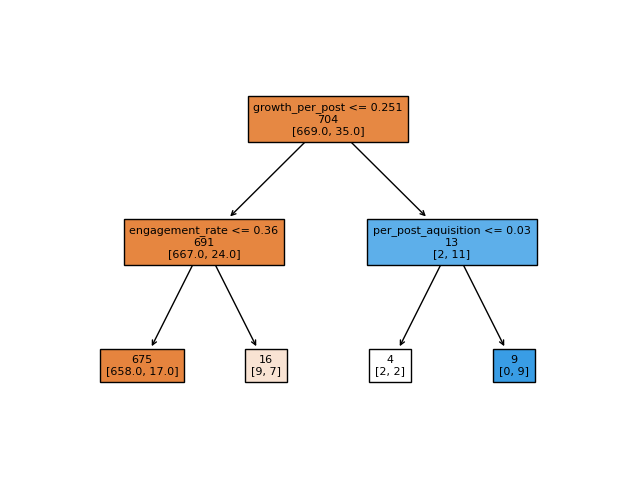

In [9]:
from IPython.display import Image
Image("surrogate_final.png")

![title](surrogate_final.png)

Having done so we have found that large values of growth_per_post and per_post_aquisition are a good indicator of an outlier in about 96.31% of outlier predictions based on knn. Thus large values of these featurs are the most expressive from our engineered columns when it comes to detecting outliers in the knn sense defiined above (after normalization).

##### 2.2 Shapley Values

To gain insights on how our model predicts the outliers of our dataset we use shapley values to plot the metrics having the most influence on the prediction of our model. This method helps us in also choosing metrics that explain our model the most but especilly which features have an influence on the final outlier prediction.
![title](output.png)




#### 2.3. IsolationForest

We use an IsolationForest to check if the metrics we obtained to characterize our anomalies in the dataset are in fact meaningful and useful. We use this method for its ease of computation in big datasets, for it not needing normalization and it's robustness to data contamination, making it a great choice to plot our anomaly metrics over time. We also don't try to optimize the parameters as this model serves as a sanity check. We can immediately see that the model struggles to fit the anomalies at the beginning of the time series, but fits them well at the end. This is due to the model getting more contextual data with time and the metrics getting better. We see that our metrics catch a lot of the anomaly dynamics.

![title](IsolForest1.png)
![title](IsolForest2.png)
![title](IsolForest3.png)


## Model enhancement
To further enhance our models we have come up with these action plans:
Consider alternative data:
We expect the social media metrics we created to correlate with financial company performance in some way, especially in specific sectors
Brand perception is a key marketing metric which we did not have access to, we expect high correlation as well.
Further analyse created metrics:
The framework we applied may very well be used to use different outlier detection algorithms or surrogate methods to get a good insight into our created metrics


## 3. Actionable Insights

### 3.1 Understanding Social Media

Social media performance helps us understand how companies interact with their customers online. High-performing companies on social media often have engaging content and a strong connection with their audience. On the other hand, companies that do not perform well might need to improve their social media strategies.

### 3.2 Actionable Insights

**Finding Unicorn**

High Engagement: Finding Unicorn is a company that makes art toys. These toys are very visually appealing, which helps them get a lot of attention on social media.

Brand Image: They have a friendly and creative image that attracts many people on platforms like Instagram.

What to Do: Companies should focus on making their social media posts more attractive and engaging. They should also work on creating a unique and likable brand image.

**Funko**

Established Brand: Funko has been around for a long time and is known for its collectible figurines.
Product Variety: They regularly release new products, which keeps their audience interested.

What to Do: Continue using the brand's history and variety of products to keep people interested. Collaborating with other brands could also attract more followers.

**Powerade**

Low Engagement: Even though Powerade is a well-known brand, it does not perform as well on social media. This might be because their posts are not as relatable or interesting as they could be.

Comparison: Other brands from the same company, like Costa Coffee, do better because they fit more naturally into what people like to see on social media.

What to Do: Powerade should try to make their social media content more about lifestyle and include their audience more by using things like user-generated content or interactive campaigns.

### 3.3 Recommendations for UBS

Investments: Look at investing in companies like Finding Unicorn and Funko, as they show how effectively engaging with customers can lead to better company performance.

Risk Management: Help companies like Powerade change their social media approach to improve their online presence and reduce business risks.

Strategy Enhancement: Use what we've learned from successful companies to help other businesses improve their social media strategies. This can help them attract more customers and compete better in their markets.





